<a href="https://colab.research.google.com/github/tuilatoan15/6351071071_Lab2/blob/main/6351071071_LAB2_Bai4(Trang26)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Câu 3

Nguyễn Hữu Toàn – 6351071071
Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Một vài dòng đầu:
   fixed acidity  volatile acidity  citric acid  resid

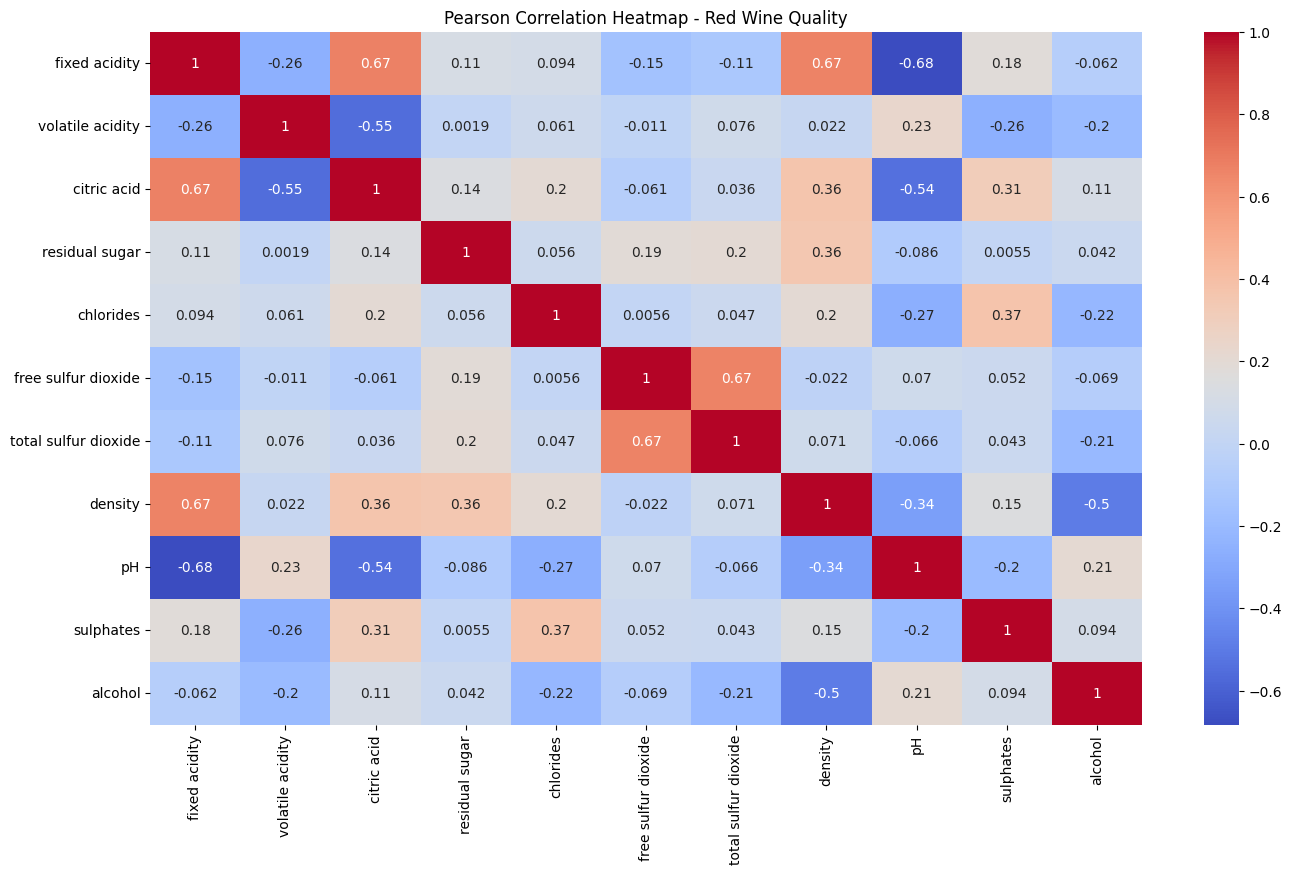

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file
data = pd.read_csv("winequality-red.csv")

print("Nguyễn Hữu Toàn – 6351071071")
print("Thông tin dữ liệu:")
print(data.info())
print("\nMột vài dòng đầu:")
print(data.head())

# Chọn các cột số để tính Pearson correlation
numeric_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',
                'chlorides','free sulfur dioxide','total sulfur dioxide','density',
                'pH','sulphates','alcohol']

plt.figure(figsize=(16,9))
sns.heatmap(data[numeric_cols].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap - Red Wine Quality")
plt.show()

#Câu 4

In [15]:
features = data.drop('quality', axis=1)
labels = data['quality']

print("Nguyễn Hữu Toàn – 6351071071")
print("Features shape:", features.shape)
print("Labels shape  :", labels.shape)

Nguyễn Hữu Toàn – 6351071071
Features shape: (1599, 11)
Labels shape  : (1599,)


#câu 5

In [16]:
categorical_cols = features.select_dtypes(exclude=['int64','float64']).columns
features_onehot = pd.get_dummies(features, columns=categorical_cols)

print("Nguyễn Hữu Toàn – 6351071071")
print("Shape của features sau khi one-hot:", features_onehot.shape)

Nguyễn Hữu Toàn – 6351071071
Shape của features sau khi one-hot: (1599, 11)


#Câu 6

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_onehot, labels, test_size=0.3, random_state=42
)

print("Nguyễn Hữu Toàn – 6351071071")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Nguyễn Hữu Toàn – 6351071071
X_train shape: (1119, 11)
X_test shape: (480, 11)
y_train shape: (1119,)
y_test shape: (480,)


#Câu 7

Nguyễn Hữu Toàn – 6351071071
ID3 Accuracy: 0.5833333333333334
Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.12      0.10        17
           5       0.70      0.66      0.68       195
           6       0.60      0.60      0.60       200
           7       0.43      0.46      0.44        61
           8       0.25      0.17      0.20         6

    accuracy                           0.58       480
   macro avg       0.34      0.33      0.34       480
weighted avg       0.59      0.58      0.59       480



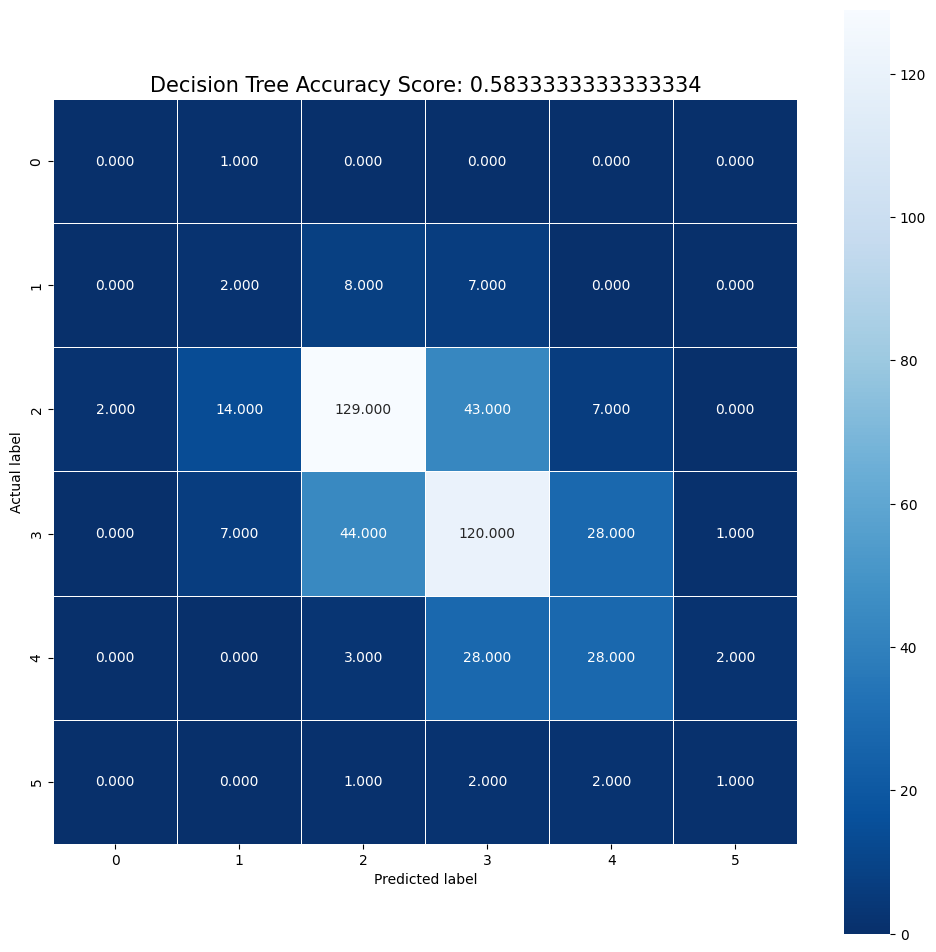

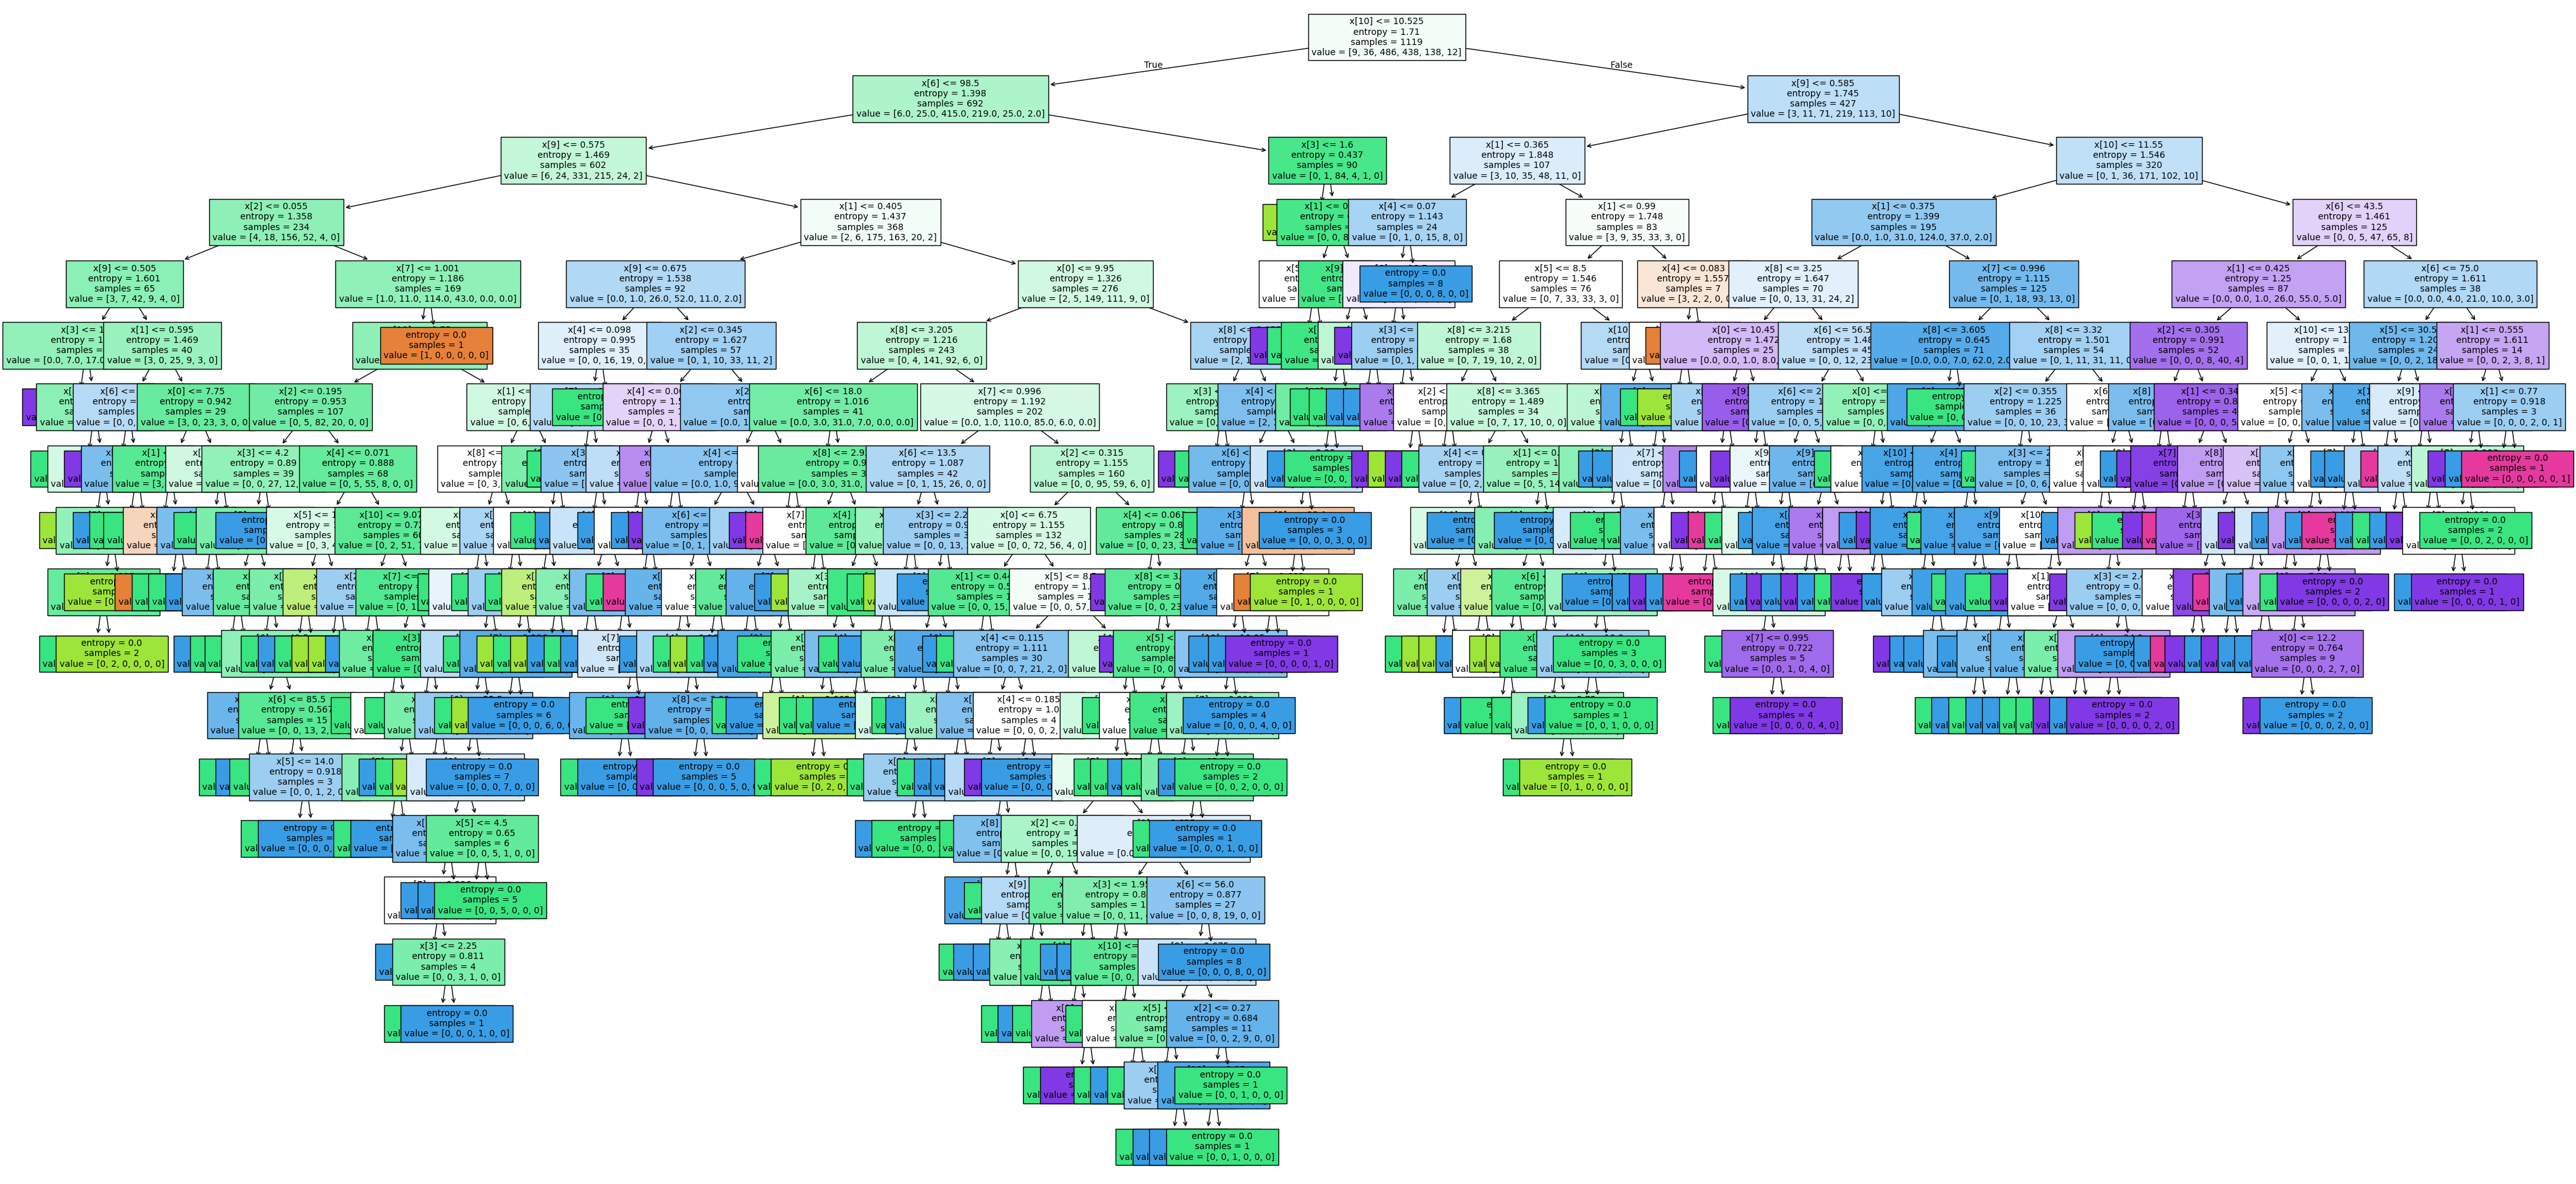

In [13]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)

print("Nguyễn Hữu Toàn – 6351071071")
print("ID3 Accuracy:", tree_score)
print("Report:\n", metrics.classification_report(y_test, tree_pred))

tree_cm = metrics.confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Accuracy Score: {0}'.format(tree_score), size=15)
plt.show()

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree_redwine.png', dpi=100)
plt.show()

#Câu 8

Nguyễn Hữu Toàn – 6351071071
CART Accuracy: 0.5625
Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.64      0.62      0.63       195
           6       0.57      0.58      0.57       200
           7       0.45      0.49      0.47        61
           8       0.33      0.33      0.33         6

    accuracy                           0.56       480
   macro avg       0.34      0.35      0.35       480
weighted avg       0.56      0.56      0.56       480



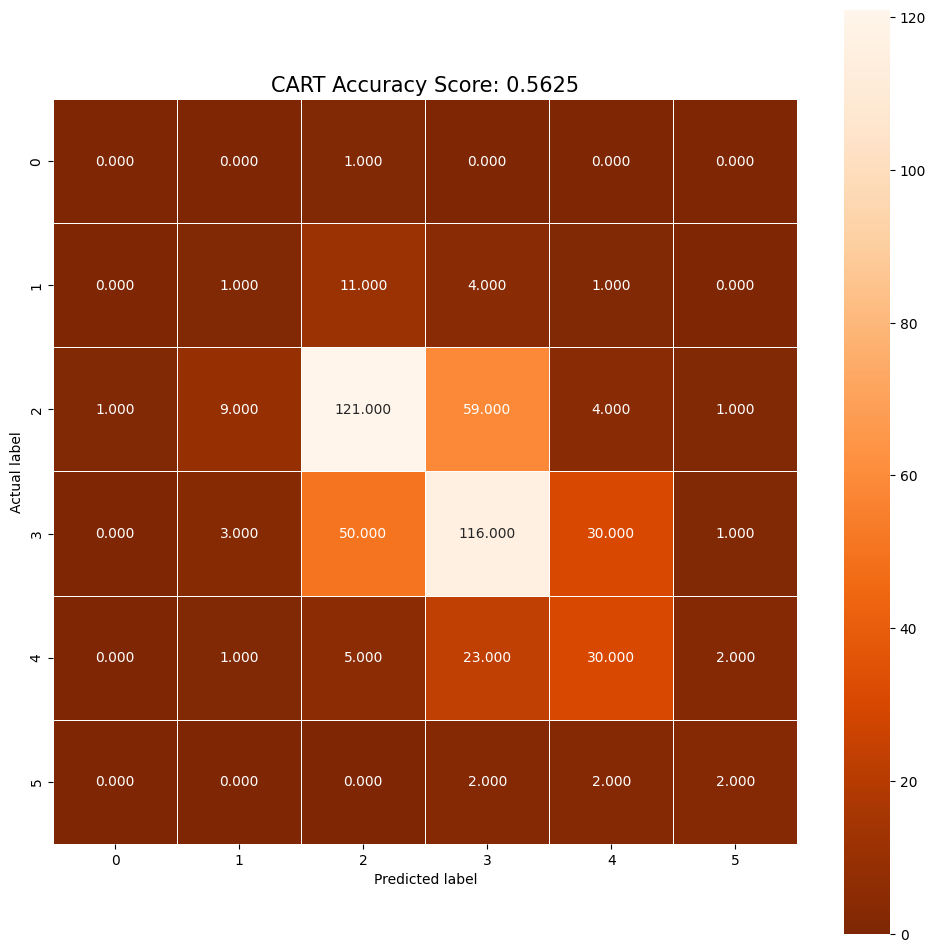

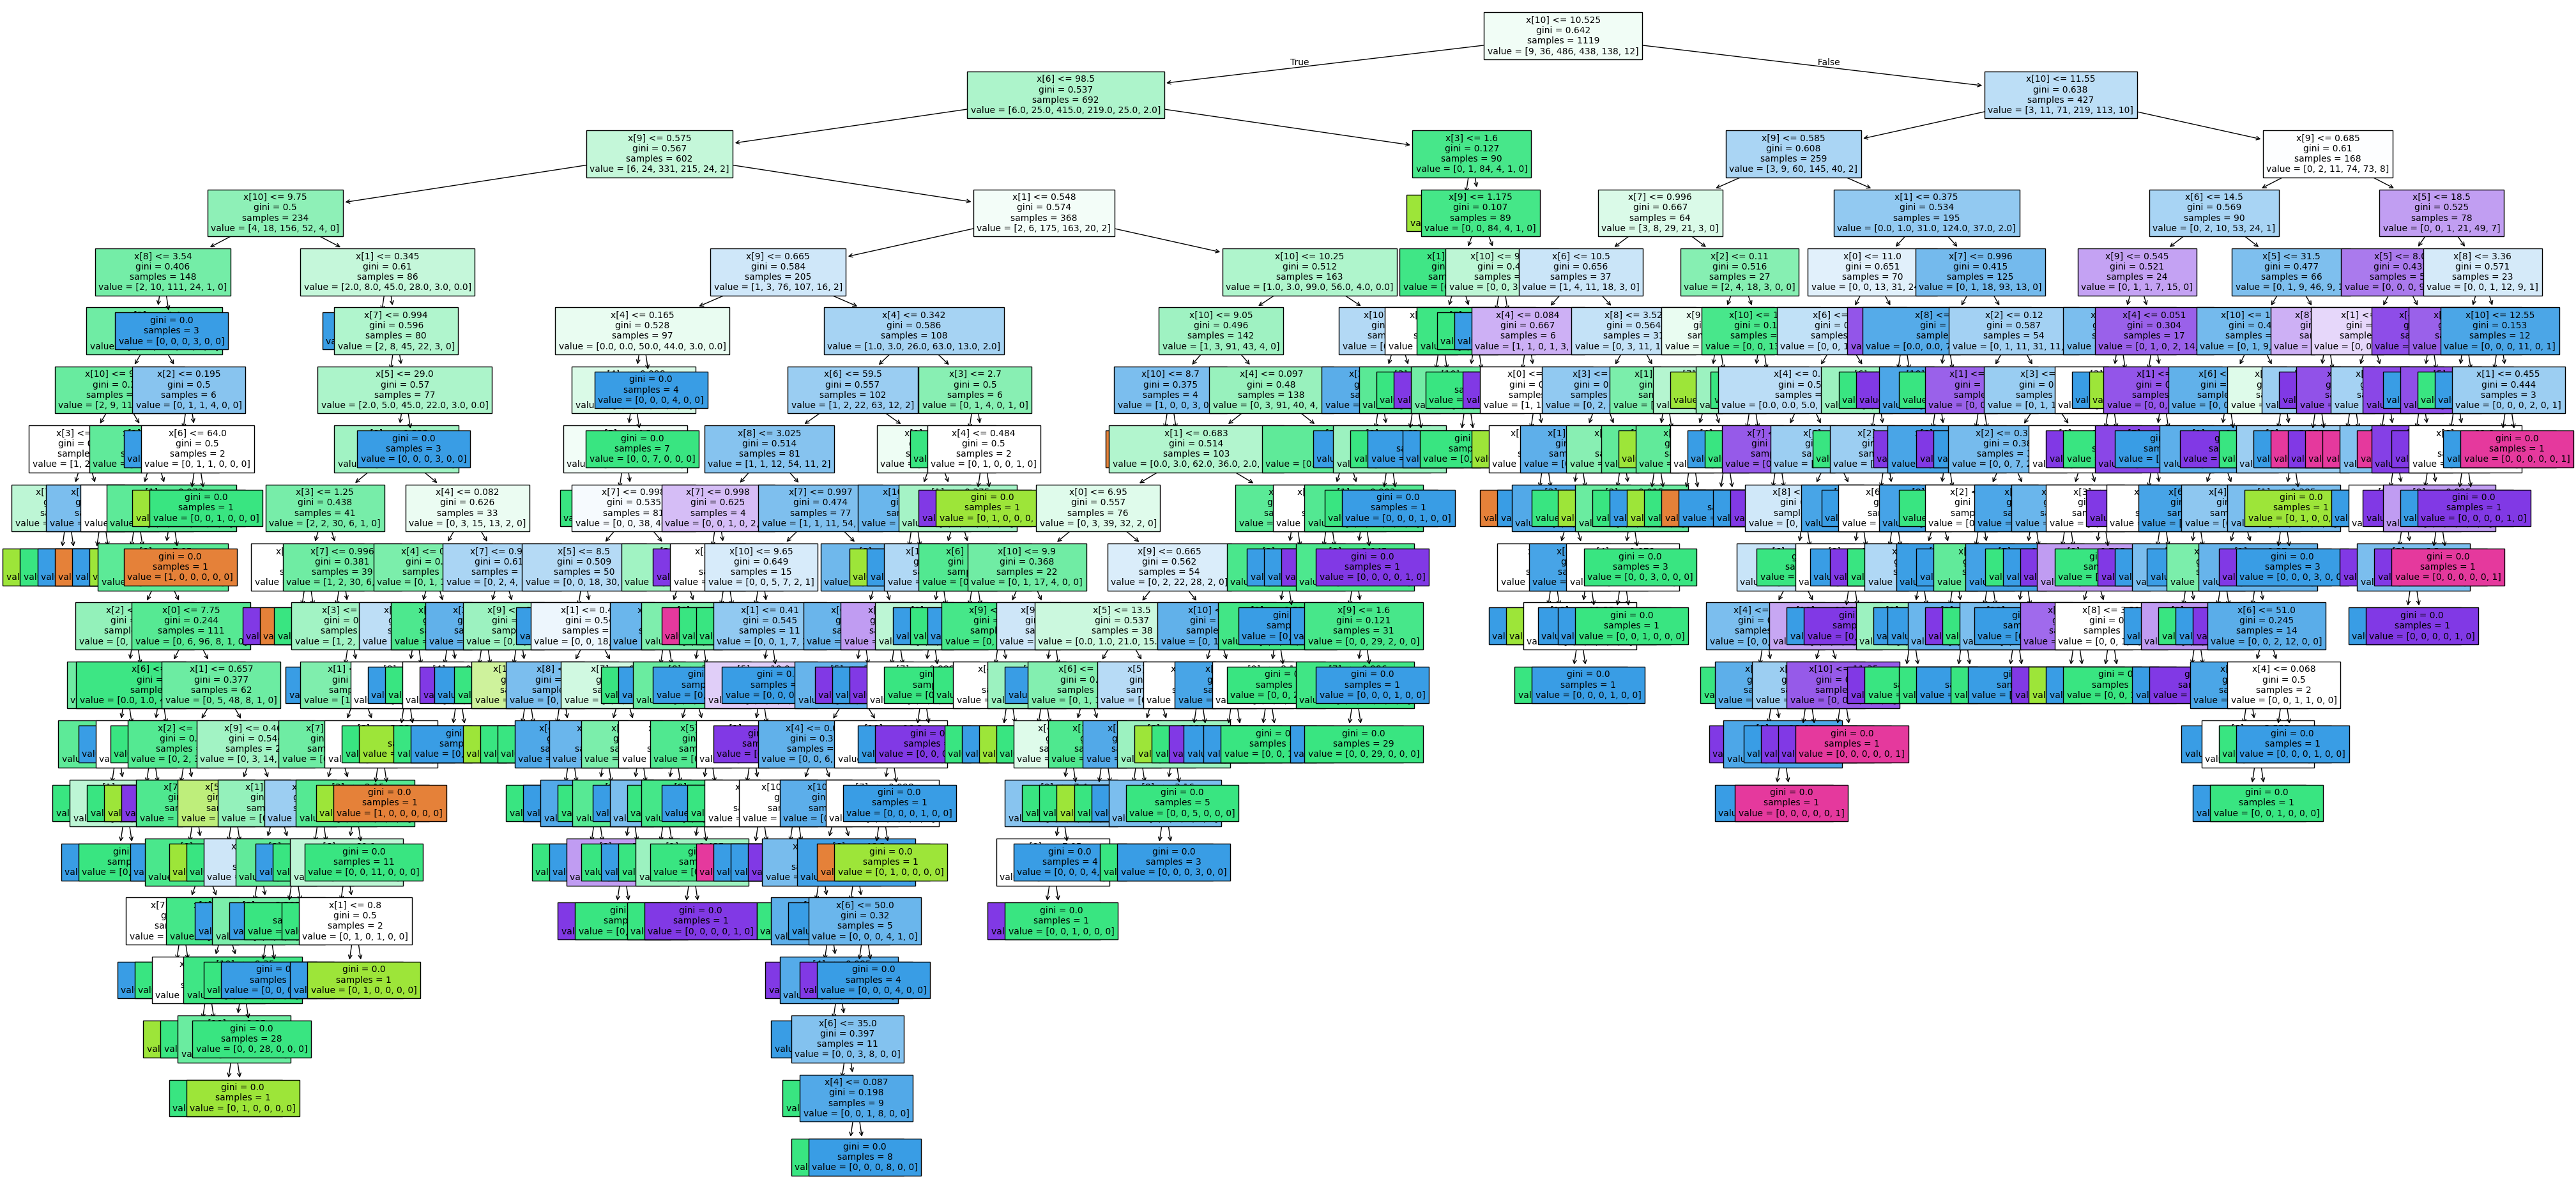

In [18]:
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf_cart.fit(X_train, y_train)

cart_pred = clf_cart.predict(X_test)
cart_score = metrics.accuracy_score(y_test, cart_pred)

print("Nguyễn Hữu Toàn – 6351071071")
print("CART Accuracy:", cart_score)
print("Report:\n", metrics.classification_report(y_test, cart_pred))

cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Oranges_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('CART Accuracy Score: {0}'.format(cart_score), size=15)
plt.show()

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf_cart, filled=True, fontsize=10)
plt.savefig('cart_tree_redwine.png', dpi=100)
plt.show()

#Câu 9

Nguyễn Hữu Toàn – 6351071071
Naive Bayes Accuracy: 0.5416666666666666
Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480



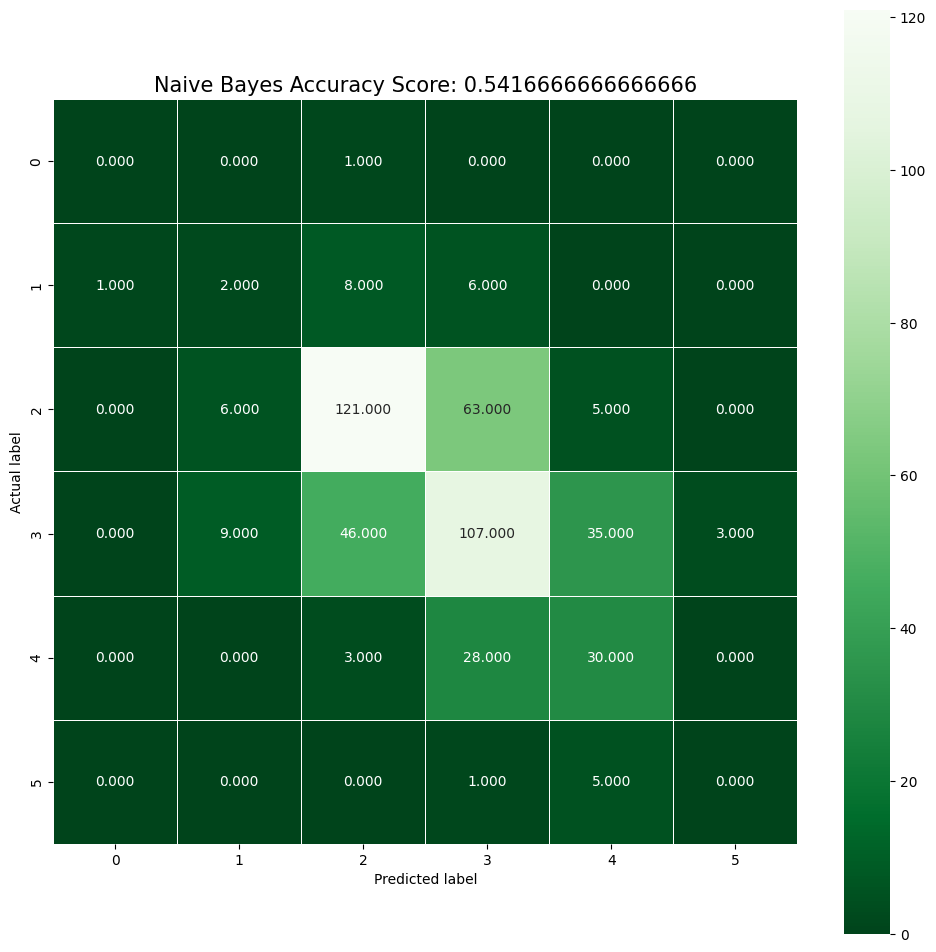

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

bayes_score = metrics.accuracy_score(y_test, bayes_pred)

print("Nguyễn Hữu Toàn – 6351071071")
print("Naive Bayes Accuracy:", bayes_score)
print("Report:\n", metrics.classification_report(y_test, bayes_pred))

bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes Accuracy Score: {0}'.format(bayes_score), size=15)
plt.show()

#Câu 10

#Nguyễn Hữu Toàn - 6351071071
##1. Accuracy tổng thể:
Mô hình ID3 Decision Tree đạt độ chính xác khoảng 0.583, cao nhất trong ba mô hình. CART Decision Tree có accuracy khoảng 0.562, chỉ hơi thấp hơn. Naive Bayes có accuracy thấp nhất, khoảng 0.542. Nhìn chung, các mô hình chỉ dự đoán đúng khoảng 54–58% trên tập kiểm thử, thể hiện đây là bài toán phân loại nhiều nhãn (multi-class) phức tạp.

##2. Dự đoán theo nhãn:
- ID3: Dự đoán tốt nhãn phổ biến là 5 và 6, với f1-score lần lượt 0.68 và 0.60. Nhãn ít xuất hiện như 3 và 8 gần như không được dự đoán đúng.
- CART: Cân bằng hơn một chút so với ID3, nhưng nhãn ít xuất hiện vẫn dự đoán kém. Nhãn 5, 6, 7 dự đoán chính xác hơn, f1-score lần lượt 0.63, 0.57, 0.47.
- Naive Bayes: Mô hình dự đoán khá kém, đặc biệt nhãn 3 và 8 không dự đoán được. F1-score nhãn phổ biến 5 và 6 là 0.65 và 0.53. Mô hình chịu ảnh hưởng bởi giả thiết các thuộc tính độc lập, trong khi dữ liệu thực tế có mối quan hệ phức tạp giữa các đặc trưng.

##3. Nhận xét chung:
- Các mô hình ID3 và CART phù hợp với việc dự đoán nhãn phổ biến, nhưng kém nhãn ít xuất hiện.
- CART có độ cân bằng giữa nhãn lớn và nhãn nhỏ tốt hơn một chút so với ID3.
- Naive Bayes không hiệu quả trong bài toán này do dữ liệu nhiều nhãn và các thuộc tính có mối liên hệ với nhau, vi phạm giả thiết độc lập.